# Final Project - Bayesian model selection

In [2]:
import arviz as az
import numpy as np
import pymc3 as pm

from matplotlib import pyplot as plt
from scipy.special import betaln
from scipy.stats import beta

In [20]:

np.random.seed(11)           # for reproducibility
a=0.25                       # biased coin
flips=np.random.rand(2**12)  # simulates 4096 coin flips
heads=flips<a    # boolean array, heads[i]=True if flip i is heads
np.sum(heads)

983

Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.028
Stage:   3 Beta: 0.104
Stage:   4 Beta: 0.580
Stage:   5 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.010
Stage:   2 Beta: 0.028
Stage:   3 Beta: 0.111
Stage:   4 Beta: 0.642
Stage:   5 Beta: 1.000
Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.025
Stage:   1 Beta: 0.212
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.028
Stage:   1 Beta: 0.237
Stage:   2 Beta: 1.000


<bound method MultiTrace.get_values of <MultiTrace: 2 chains, 1000 iterations, 1 variables>>

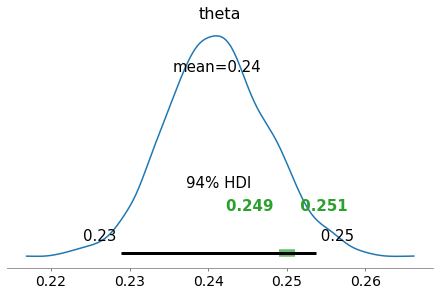

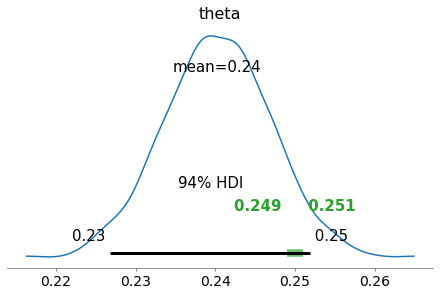

In [44]:
with pm.Model() as model1: #model of a fair coin
    theta = pm.Normal("theta",mu=.5,sigma=.1) #prior for the parameter theta
    yl = pm.Bernoulli("yl", theta, observed=heads[:20]) #likelihood given the measured data
    trace1 = pm.sample_smc(1000, random_seed=42, parallel=False) #sample from posterior
with pm.Model() as model2: #model of biased coin  
    theta = pm.Normal("theta",mu=.25,sigma=.1) #prior for the parameter theta
    yl = pm.Bernoulli("yl", theta, observed=heads[:20]) #likelihood given the measured data
    trace2 = pm.sample_smc(1000, random_seed=42, parallel=False) #sample from posterior
with model1:
    az.plot_posterior(trace1,rope=[0.249,0.251])
with model2:
    az.plot_posterior(trace2,rope=[0.249,0.251])


In [55]:
a=az.numpy_to_data_array(trace1)
BF_smc = np.exp(trace2.report.log_marginal_likelihood - trace1.report.log_marginal_likelihood)#bayes factor
np.round(BF_smc)

array([28., 30.])

TypeError: 'DataArray' object is not callable